### 가설
* 데이터 : 서울글로벌센터 월별 상담실적 (자료제공:외국인다문화담당관)
1. 상담내용 중 보건/의료의 비중이 높을 것이다

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Multicultural_family_question.csv', engine='python')
df

,년월,대분류,중분류,전화,방문,이메일,게시판,화상상담,이동상담,합계
0,202103,교육,교육기관,6,0,0,0,0,0,6
1,202103,교육,기타,2,2,0,0,0,0,4
2,202103,교육,보육시설,2,0,0,0,0,0,2
3,202103,교육,불편/개선건의,1,0,0,0,0,0,1
4,202103,교육,일반교육,18,4,0,0,0,0,22
...,...,...,...,...,...,...,...,...,...,...
2624,201907,행정,자동차관련,8,1,1,0,0,0,10
2625,201907,행정,출생 및 사망,8,0,2,0,0,0,10
2626,201907,행정,행정기관,98,7,0,0,0,0,105
2627,201907,행정,행정소송,3,0,0,0,0,0,3


In [13]:
df_sample = df.iloc[:,[1,2,9]]
df_sample

,대분류,중분류,합계
0,교육,교육기관,6
1,교육,기타,4
2,교육,보육시설,2
3,교육,불편/개선건의,1
4,교육,일반교육,22
...,...,...,...
2624,행정,자동차관련,10
2625,행정,출생 및 사망,10
2626,행정,행정기관,105
2627,행정,행정소송,3


In [62]:
df2 = df_sample.groupby(by=['대분류']).sum().sort_values(by='합계', ascending=False)

df_2 = df2.reset_index()
df_2

,대분류,합계
0,출입국,16243
1,노무,11950
2,보건/복지,9238
3,행정,8189
4,교육,5331
5,기타,3586
6,주거,1068
7,안전,943
8,여성/가족,619
9,금융,544


In [15]:
df_sample2 = df.iloc[:,[0,1,2,9]]
df_sample2

,년월,대분류,중분류,합계
0,202103,교육,교육기관,6
1,202103,교육,기타,4
2,202103,교육,보육시설,2
3,202103,교육,불편/개선건의,1
4,202103,교육,일반교육,22
...,...,...,...,...
2624,201907,행정,자동차관련,10
2625,201907,행정,출생 및 사망,10
2626,201907,행정,행정기관,105
2627,201907,행정,행정소송,3


In [21]:
df3 = df_sample2.groupby(by=['년월','대분류']).sum().groupby(level=[0]).cumsum()
df3

합계
년월     대분류        
201907 교육      227
       교통      235
       금융      271
       기타      479
       노무     1130
...            ...
202103 여성/가족  1482
       정보통신   1501
       주거     1556
       출입국    2299
       행정     2635

[294 rows x 1 columns]

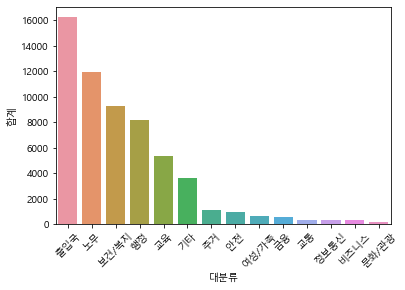

In [63]:
import matplotlib.font_manager as fm

# font_path = r'C:\Users\yunjo\NanumBarunGothic.ttf'
# fontprop = fm.FontProperties(fname=font_path, size=18)

# plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rc('font', family='Malgun Gothic')

# df2.plot(kind='bar')
bar = sns.barplot(data = df_2, x = "대분류", y = "합계")
plt.xticks(rotation=45)
plt.show()

외국인들의 주요문제인 출입국, 노무 문제관련 다음으로 높은 상담내용이 ''보건/복지''이므로 가설 검정이 되었다.